In [69]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [70]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [71]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [72]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [73]:
# Train the model
model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 56s 29ms/step - loss: 0.1460 - accuracy: 0.9537
Epoch 2/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0462 - accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0338 - accuracy: 0.9895
Epoch 4/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0251 - accuracy: 0.9917
Epoch 5/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0205 - accuracy: 0.9936


In [74]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 4s 11ms/step - loss: 0.0280 - accuracy: 0.9918
Test accuracy: 0.9918000102043152


In [75]:
# Make predictions
predictions = model.predict(test_images.reshape(-1, 28, 28, 1))

313/313 [==============================] - 3s 9ms/step


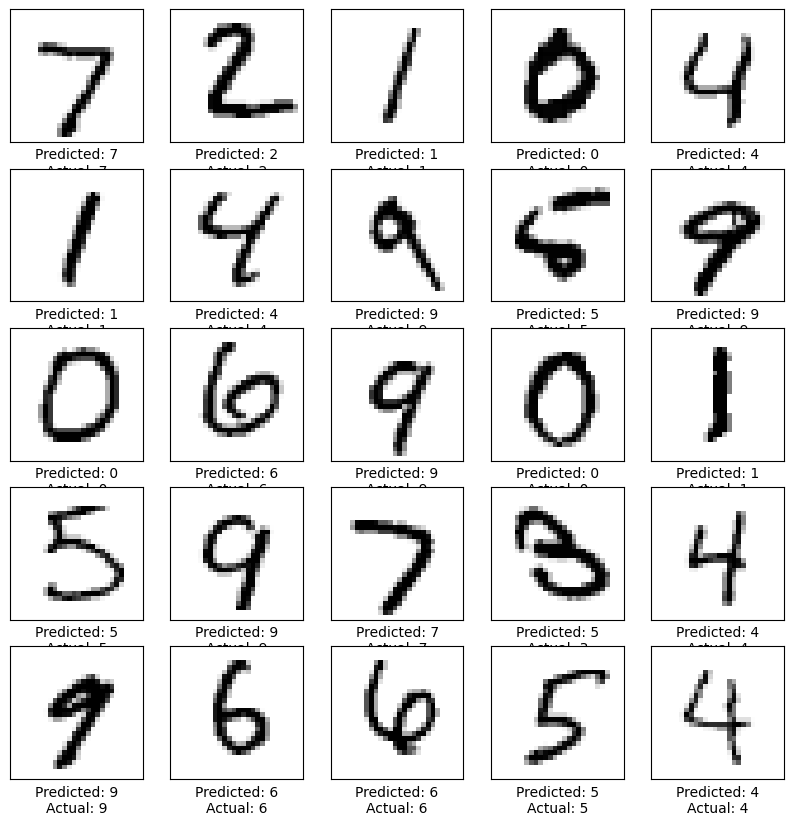

In [76]:
# Visualize a few predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Predicted: {tf.argmax(predictions[i])}\nActual: {test_labels[i]}')
plt.show()